<a href="https://colab.research.google.com/github/harshshr04/Fibonacci-coders_KOC08_CipherSchools-/blob/main/Detect_Unsafe_Vehicle_Loads_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q tensorflow keras matplotlib

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive


In [ ]:
train_dir = '/content/drive/MyDrive/Vehicle_Load_Dataset/train'
val_dir = '/content/drive/MyDrive/Vehicle_Load_Dataset/val'

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), class_mode='binary', batch_size=32)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(150, 150), class_mode='binary', batch_size=32)


Found 5 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2000 - loss: 0.7350 - val_accuracy: 0.6000 - val_loss: 0.7461
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - accuracy: 0.6000 - loss: 0.6868 - val_accuracy: 0.8000 - val_loss: 0.6362
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - accuracy: 0.2000 - loss: 1.0796 - val_accuracy: 1.0000 - val_loss: 0.6242
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 0.4000 - loss: 0.6359 - val_accuracy: 1.0000 - val_loss: 0.6103
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.6000 - loss: 0.8810 - val_accuracy: 0.8000 - val_loss: 0.6104
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step - accuracy: 0.0000e+00 - loss: 0.8682 - val_accuracy: 0.8000 - val_loss: 0.6130
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.6000 - loss: 0.6109 - val_accuracy: 0.8000 - val_loss: 0.6012
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.4000 - loss: 0.7075 - val_accuracy: 0.8000 - val_loss

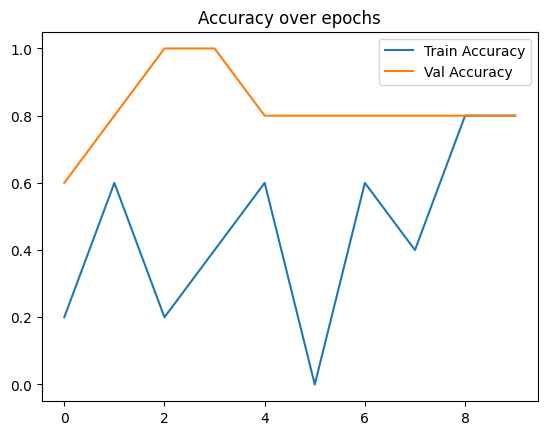

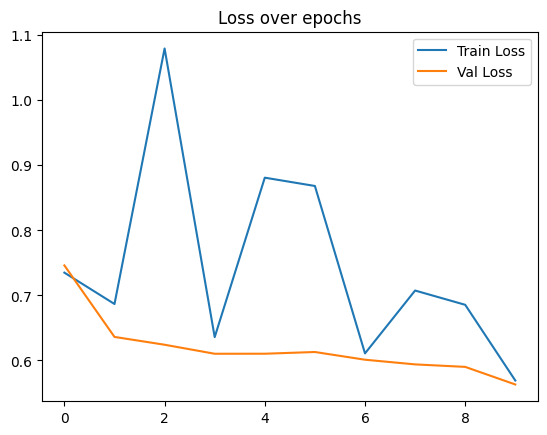

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()


In [16]:
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/test_vehicle/img4.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)/255.
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Unsafe Load" if prediction[0][0] > 0.5 else "Safe Load")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Safe Load
